# SOLVING LINEARY SYSTEMS OF DIFFERENTIAL EQUATIONS

# Preliminaries

In [1]:
import control as c
from controlSBML.control_sbml import ControlSBML
import controlSBML.constants as cn
try:
    from symmathSBML.symmath_sbml import SymmathSBML
except:
    pass

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tellurium as te

import os

# Terminology and Theory

Let ${\bf x}$ be a vector of $N$ of the variables $[x_1, \cdots, x_N]^T$ such that $\frac{d x_n}{d t} = a_{n, 1} x_1 + \cdots + a_{n, N} x_N$. Or,
$\frac{{d \bf x}}{dt} = {\bf A} {\bf x}$, where the $n,m$ entry in ${\bf A}$ is $a_{n,m}$.

We call this a **linear, homogeneous differential equation**.
If we are given initial values for the $x_n$, then this is an **initial value problem**.

To solve a homogeneous linear system, consider the eigenvalues $\lambda_i$ and associated eigenvectors $e_i$ of ${\bf A}$.
By definition. ${\bf A} {\bf e}_i = \lambda_i {\bf e}_i$.

Now, consider a candidate solution ${\bf x} = c_1 {\bf e}_1 e^{\lambda_1 t} + \cdots +  c_1  {\bf e}_N  e^{\lambda_N t}$.
Note that



$$
\begin{align}
\frac{{d \bf x}}{dt} && =&& c_1 \lambda_1 {\bf e}_1 e^{\lambda_1 t} + \cdots +  c_N \lambda_N {\bf e}_N  e^{\lambda_N t} \\
\end{align}
$$


On the other hand,
$$
\begin{align}
{\bf A} {\bf x} && =&& {\bf A} \left( c_1 {\bf e}_1 e^{\lambda_1 t} + \cdots +  c_N  {\bf e}_N  e^{\lambda_N t} \right) \\
&& = && c_1  \lambda_1 {\bf e}_1 e^{\lambda_1 t} + \cdots + c_1  \lambda_N {\bf e}_N e^{\lambda_N t}  \\
\end{align}
$$


So, the candidate solution results in equality.

Another representation of the solution to a linear homogeneous differential equation is

${\bf x}(t) = e^{ \bf A t}$, which follows from the fact that


\begin{align}
\frac{d {\bf x } (t)}{dt} &&=&& A e^{ \bf A t} \\
&& = && A {\bf x}(t) \\
\end{align}

We we elaborate later on how to calculate $e^{A t}$.

# Solving Initial Value Problems (IVP)

How do we find the $c_n$ if we are given ${\bf x} (0)$?

Let ${\bf E} = \left[ {\bf e_1} \cdots {\bf e_N} \right]^T$. Then, we have the linear system

${\bf x}(0) = {\bf E} \left[ {c_1} \cdots {c_N} \right]^T$.
If ${\bf E}$ is non-singular, then there is a unique solution.

# Systems with Forced Inputs

What is a forced input?

<img src="images/pendulum.jpeg"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

A forced input, or just **input**, is a vector of settings for actuators.
It can affect state (${\bf x}(t)$) directly or indirectly.
We take this into account by inclding another matrix ${\bf B}$ that translates the
input into its impact on state.
That is, the net effect on state is ${\bf B} {\bf u}(t)$.


**Examples**

${\bf x} (t) = e^{ {\bf A} t} {\bf x} (0) + \int_0^t e^{ {\bf A} (t - \tau)} {\bf B} {\bf u}(\tau) d \tau$

This is easier to interpret if the integral is approximated by a sum.

That is,
${\bf x} (t) \approx e^{ {\bf A} t} {\bf x} (0) + \sum_{m=1}^{M \Delta \tau} e^{ {\bf A} (t - m \Delta \tau)} {\bf B} {\bf u}(m \Delta \tau) \Delta \tau$,
where $\Delta \tau = \frac{t}{M}$.

Let's look at each term in the sum: $e^{ {\bf A} (t - m \Delta \tau)} {\bf B} {\bf u} (m \Delta \tau) $.
Another view of this term is to do the following:
* $t_m^{\prime} = t - m \Delta \tau$;
* ${\bf x}_m^{\prime} (0) = {\bf B} {\bf u}(m \Delta \tau)$.

So, $e^{ {\bf A} (t - m \Delta \tau)} {\bf B} {\bf u}(m \Delta \tau) = e^{ {\bf A} t_m^{\prime}} {\bf x}_m^{\prime}(0)$.
Or,
${\bf x} (t) \approx e^{ {\bf A} t} {\bf x} (0) + \sum_{m=1}^{M \Delta \tau}  e^{ {\bf A} t_m^{\prime}} {\bf x}_m^{\prime}(0)$,
That is, the effect of a forced input is just to add up the effects of running the system in different starting states based
on the value of the forced input.

# Application to Reaction Networks

Here, we show how to obtain time domain solutions for reaction networks.
We start the following sequential pathway.

$S_0 \rightarrow S_1 \rightarrow S_2 \rightarrow S_3$

$S_0$ and $S_3$ are fixed species in that there concentrations do not change (e.g., controlled externally).

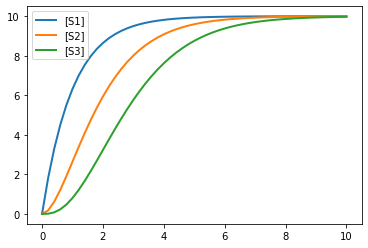

In [2]:
LINEAR_MDL = """
J0: $S0 -> S1; k0*$S0
J1: S1 -> S2; k2*S1
J2: S2 -> S3; k3*S2
J3: S3 -> $S4;k4*S3

k0 = 1
k1 = 1
k2 = 1
k3 = 1
k4 = 1
S0 = 10
S1 = 0
S2 = 0
S3 = 0
$S4 = $S0
"""
LINEAR_RR = te.loada(LINEAR_MDL)
LINEAR_RR.plot(LINEAR_RR.simulate(0, 10))

## The Sequential Pathway as a Linear System

We obtain the differential equations in the usual way.

Let ${\bf N}$ be the stoichiometry matrix, where the rows are species and the columns are reactions.